In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
import csv
import seaborn as sns
%matplotlib inline

In [2]:
#Read csv
general_df = pd.read_csv('final_zillow_info.csv')
general_df.head()

,Address,Zip,Zillow ID,Tax,Tax_Year,Home Type,Home Size,Bathrooms,Bedrooms,Last Sold Date,Last Sold Price,Zestimate Amount,Zestimate Date,Zestimate Value Change
0,5 14th,60605,60204228.0,248760.0,2017.0,Condominium,10593.0,2.0,2.0,05/27/2004,295000.0,395223.0,04/03/2019,48923.0
1,8 9th,60605,119088436.0,40600.0,2017.0,Miscellaneous,4312440.0,NaN,0.0,03/09/2018,300000.0,NaN,01/01/1970,NaN
2,234 Ashland,60605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1733 Congress,60605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1753 Congress,60605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# General data
general_df = pd.read_csv('final_zillow_info.csv').dropna(subset=['Zillow ID','Zestimate Amount','Bedrooms']).loc[general_df['Home Type']=='Condominium']
general_df.head()

,Address,Zip,Zillow ID,Tax,Tax_Year,Home Type,Home Size,Bathrooms,Bedrooms,Last Sold Date,Last Sold Price,Zestimate Amount,Zestimate Date,Zestimate Value Change
0,5 14th,60605,60204228.0,248760.0,2017.0,Condominium,10593.0,2.0,2.0,05/27/2004,295000.0,395223.0,04/03/2019,48923.0
8,23 E 13th St 606,60605,70474983.0,513000.0,2017.0,Condominium,78844.0,2.0,2.0,07/20/2012,525000.0,657483.0,04/03/2019,-597.0
9,125 E 13th St,60605,70474811.0,490400.0,2017.0,Condominium,23332.0,2.0,2.0,04/17/2013,565000.0,645588.0,04/03/2019,-24410.0
11,125 E 13th St 1002,60605,70474919.0,28050.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,36498.0,04/03/2019,96.0
12,125 E 13th St 1003,60605,70474751.0,321140.0,2017.0,Condominium,23332.0,2.0,2.0,06/12/2017,433000.0,410062.0,04/03/2019,14320.0


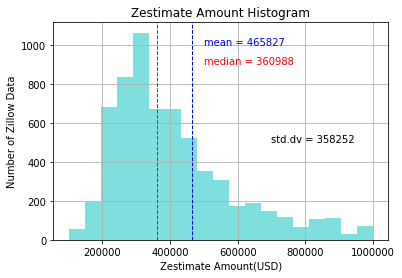

In [11]:
#Histgram 
#Calc mean, median, std dev
mean = general_df['Zestimate Amount'].mean()
median = general_df['Zestimate Amount'].median()
std = general_df['Zestimate Amount'].std()
mean_round = 'mean = ' + str(round(mean))
median_round = 'median = ' + str(round(median))
std_round = 'std.dv = ' + str(round(std))

general_df_hist_amount = general_df.drop([0]).hist(['Zestimate Amount'],range=(100000,1000000),bins=19,alpha=0.5,color='c')
plt.axvline(general_df['Zestimate Amount'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(general_df['Zestimate Amount'].median(), color='r', linestyle='dashed', linewidth=1)
plt.annotate(mean_round,xy=(500000,1000),color='b')
plt.annotate(median_round,xy=(500000,900),color='r')
plt.annotate(std_round,xy=(700000,500),color='k')
plt.xlabel('Zestimate Amount(USD)')
plt.ylabel('Number of Zillow Data')
plt.title('Zestimate Amount Histogram')
plt.savefig("Images/histogram1.png")

In [5]:
#Clean data for Increase% Histgram
general_df['Amount 30days before'] = general_df['Zestimate Amount']-general_df['Zestimate Value Change']
general_df['Increase% for 30days'] = general_df['Zestimate Value Change']/general_df['Amount 30days before']
# Increase_df = general_df.dropna(subset=['Increase% for 30days']).map('{:,.2%}'.format)

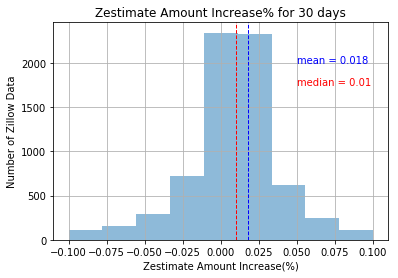

In [17]:
# Show Increase% Histgram
meanp = general_df['Increase% for 30days'].mean()
medianp = general_df['Increase% for 30days'].median()
mean_roundp = 'mean = ' + str(round(meanp,3))
median_roundp = 'median = ' + str(round(medianp,3))

general_df_hist_increase = general_df.drop([0]).hist(['Increase% for 30days'],range=(-0.1,0.1),bins=9,alpha=0.5)
plt.axvline(general_df['Increase% for 30days'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(general_df['Increase% for 30days'].median(), color='r', linestyle='dashed', linewidth=1)
plt.annotate(mean_roundp,xy=(0.05,2000),color='b')
plt.annotate(median_roundp,xy=(0.05,1750),color='r')
plt.xlabel('Zestimate Amount Increase(%)')
plt.ylabel('Number of Zillow Data')
plt.title('Zestimate Amount Increase% for 30 days')
plt.savefig("Images/histogram2.png")
#plt.show()

/Users/miiinaa223/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


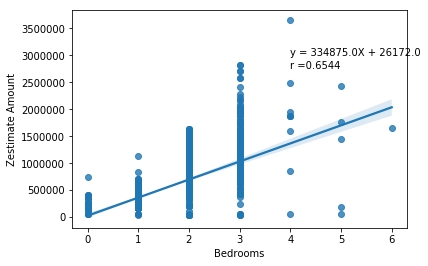

In [7]:
# Calc correlation between Zestimate amount vs Bedrooms
general_df_zip1 = general_df.loc[general_df['Zip']==60601]

# Calc r
r = np.corrcoef (general_df_zip1['Bedrooms'], general_df_zip1['Zestimate Amount'])[1,0]
r_round = 'r =' + str(r.round(4))

# Calc Linear function
myXset = np.array(general_df_zip1['Bedrooms'])
myYset = np.array(general_df_zip1['Zestimate Amount'])
coefficient = np.polyfit(myXset, myYset, 1)
Y_func = np.poly1d(coefficient)
linear = 'y = ' + str(coefficient[0].round()) + 'X + ' + str(coefficient[1].round())
linear

# Show scatter
sns.regplot(x='Bedrooms',y='Zestimate Amount',data=general_df_zip1,truncate=True)
plt.annotate(linear,xy=(4,3000000))
plt.annotate(r_round,xy=(4,2750000))
plt.savefig("Images/scatter.png")

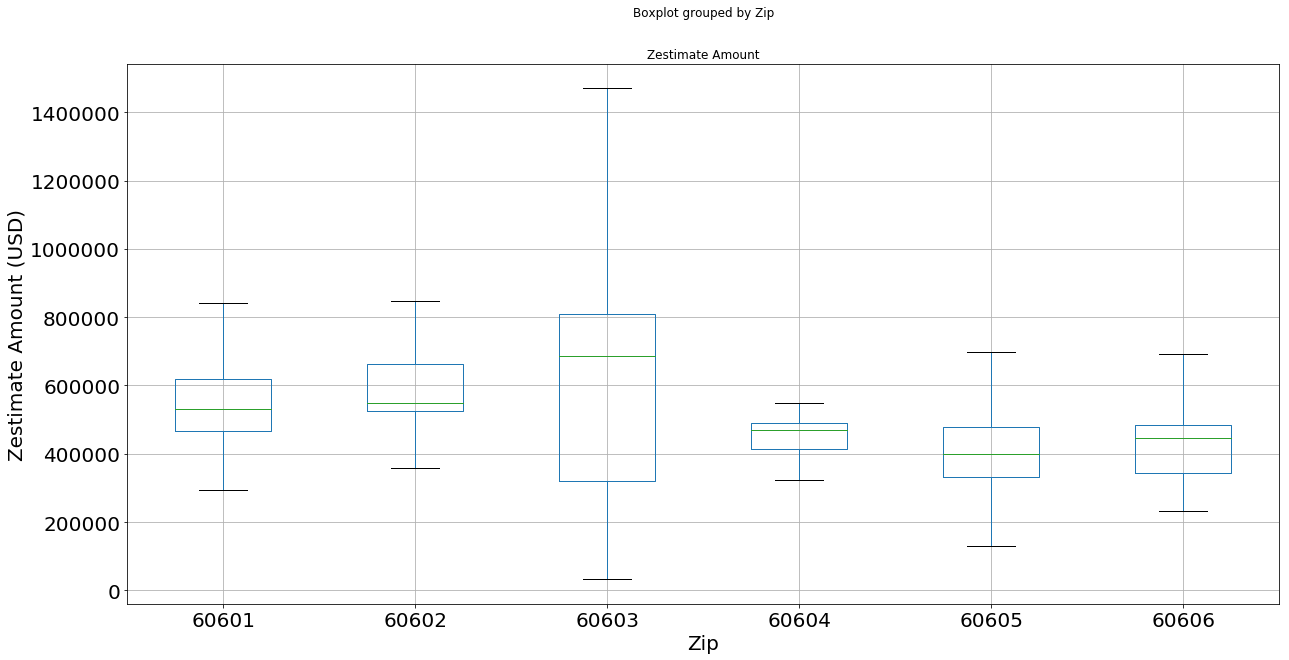

In [8]:
# only focus on 2bed/2bath to see the variance of amount by zip
Boxplot = general_df.loc[general_df['Bedrooms']==2].loc[general_df['Bathrooms']==2]
Boxplot.boxplot('Zestimate Amount',by="Zip",figsize=(20, 10),fontsize=20,showfliers=False)
plt.xlabel('Zip', size = 20)
plt.ylabel('Zestimate Amount (USD)', size = 20)
plt.savefig("Images/boxplot.png")